In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/alext234/coronavirus-stats/master/data/who-global-cases.csv',index_col=0)

In [3]:
data.head()

,global_cases,report_url
date,,
2020-01-27,2798,https://www.who.int/docs/default-source/corona...
2020-01-28,4593,https://www.who.int/docs/default-source/corona...
2020-01-29,6065,https://www.who.int/docs/default-source/corona...
2020-01-30,7818,https://www.who.int/docs/default-source/corona...
2020-01-31,9826,https://www.who.int/docs/default-source/corona...


In [4]:
data.tail()

,global_cases,report_url
date,,
2020-03-11,118326,https://www.who.int/docs/default-source/corona...
2020-03-12,125048,https://www.who.int/docs/default-source/corona...
2020-03-12,125260,https://www.who.int/docs/default-source/wrindi...
2020-03-13,132758,https://www.who.int/docs/default-source/corona...
2020-03-14,142539,https://www.who.int/docs/default-source/corona...


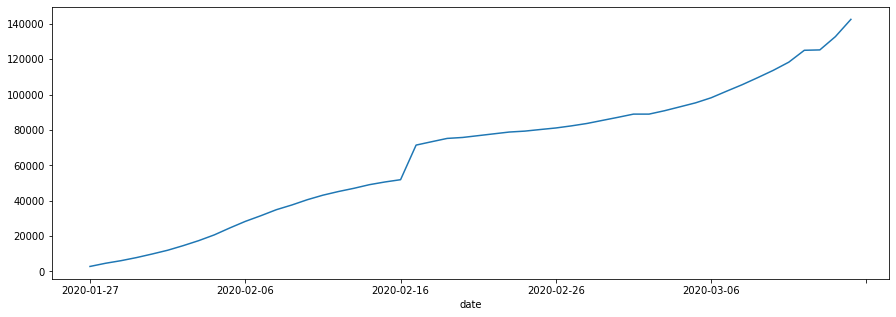

In [5]:
data.global_cases.plot(figsize=(15, 5))

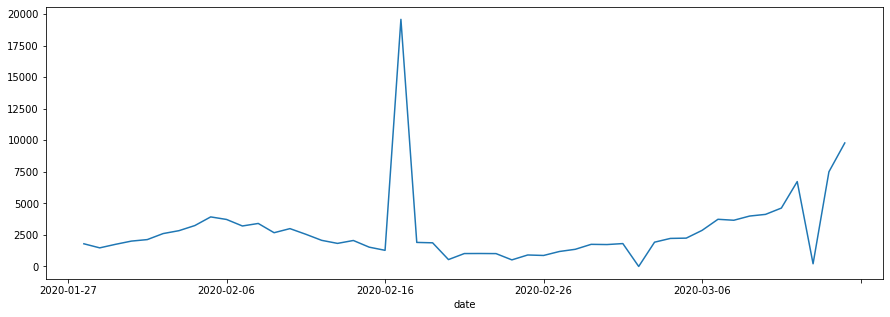

In [6]:
(data.global_cases - data.global_cases.shift(1)).plot(figsize=(15, 5))

In [7]:
from pyramid.arima import auto_arima

In [8]:
stepwise_model = auto_arima(data.global_cases,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0); AIC=927.791, BIC=931.575, Fit time=0.029 seconds
Fit ARIMA: order=(1, 1, 0); AIC=929.466, BIC=935.141, Fit time=0.541 seconds
Fit ARIMA: order=(0, 1, 1); AIC=929.488, BIC=935.163, Fit time=0.222 seconds
Fit ARIMA: order=(1, 1, 1); AIC=931.230, BIC=938.797, Fit time=1.457 seconds
Total fit time: 3.708 seconds


In [9]:
stepwise_model.aic()

927.7914896133168

In [10]:
stepwise_model.fit(data.global_cases)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 1, 0),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [11]:
predicted_days = 15
firstPredictionDay = datetime.datetime.strptime(data.index[-1], '%Y-%m-%d') + datetime.timedelta(days = 1)

In [12]:
future_forecast = stepwise_model.predict(n_periods=predicted_days)

In [13]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(future_forecast[x])))

2020-03-15 - 145390
2020-03-16 - 148242
2020-03-17 - 151094
2020-03-18 - 153946
2020-03-19 - 156798
2020-03-20 - 159650
2020-03-21 - 162501
2020-03-22 - 165353
2020-03-23 - 168205
2020-03-24 - 171057
2020-03-25 - 173909
2020-03-26 - 176761
2020-03-27 - 179613
2020-03-28 - 182464
2020-03-29 - 185316
